In [1]:
from libs.edgelistParser import edgelistParser,list2matrix
from libs.approximateSimrank import approximateSimrank
from matplotlib import pyplot as plt
import numpy as np
A, N, D = edgelistParser("../datasets/facebook/0.edges")

5038


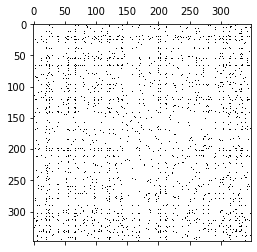

In [2]:
# Let's convert the edge list to a dense matrix
A_mat = list2matrix(A)
plt.spy(A_mat)
#Simmetry check (we work on undirect graph)
print(np.sum(A_mat == A_mat.T))

In [14]:
# This function creates the L matrix iterating locally the approximate simrank
def localPageRank(A,N,D,c):
    L = np.zeros((N,N))
    for i,node in enumerate(A):
        p = approximateSimrank(A, N, D, i, c, 1e-5)
        for neighbour in node:
            L[i,neighbour[0]] = p[neighbour[0]]
    return L

In [15]:
# Pagerank teleportation constant
c = 0.85
L = localPageRank(A, N, D, c)